In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from GDAnalysisAC import LinDiscAnalysis
from GDAnalysisAC import utilsAC

In [127]:
def pipeline(X, y):
    train_x, train_y, test_x, test_y = utilsAC.splitTrainTest(X, y, train_ratio=0.7)
    train_x, train_min, train_max = utilsAC.normMinMax(train_x, mode='train')
    test_x = utilsAC.normMinMax(test_x, mode='test', train_min=train_min, train_max=train_max)

    lda_ac = LinDiscAnalysis()
    lda_ac.fit(train_x, train_y)
    pred1 = lda_ac.predict(test_x)
    pf = utilsAC.get_performance_measure(test_y, pred1)
    print(f'Performance Measures: {pf}\n')
    print(f'Trained weights: {lda_ac.get_params()}\n')
    utilsAC.plot_dec_bound(X, y, lda_ac.get_params())
    pred_prob = lda_ac.predict(test_x, prob=True)
    thresh = np.arange(-1, 1, 0.001)
    utilsAC.plot_roc(test_y, pred_prob, thresh=thresh)

## Data 1

In [128]:
data1 = pd.read_csv('data1.csv', header=None)
data1.head()

,0,1,2
0,-0.69736,-3.6535,1
1,-4.82200,-7.6336,1
2,-8.23430,-7.5536,1
3,-6.07640,-11.3800,1
4,-10.73600,-14.3760,1


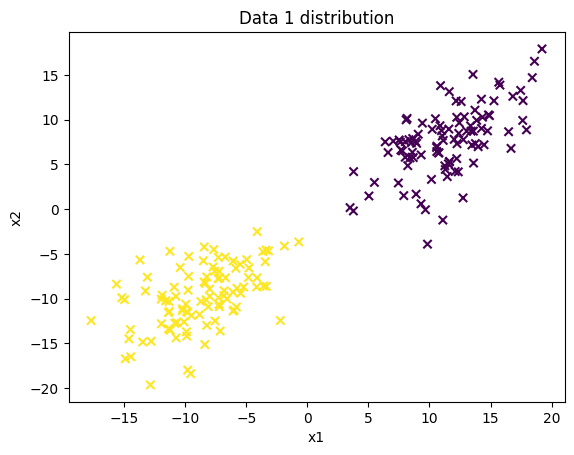

In [129]:
plt.scatter(data1[0], data1[1], marker='x', c=data1[2])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data 1 distribution')
plt.show()

In [130]:
data1_x = data1.iloc[:, :-1]
data1_y = data1.iloc[:, -1]

data1_y.value_counts()

2
1    100
0    100
Name: count, dtype: int64

Performance Measures: {'tp': 33, 'tn': 27, 'fp': 0, 'fn': 0, 'precision': 1.0, 'recall': 1.0, 'spec': 1.0, 'f1': 1.0}

Trained weights: [ 3.35750896 -4.85893587 -1.81177286]



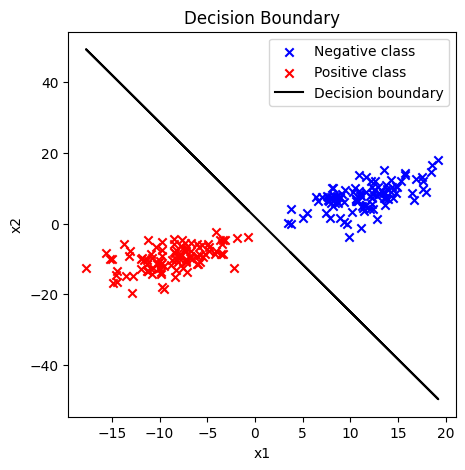

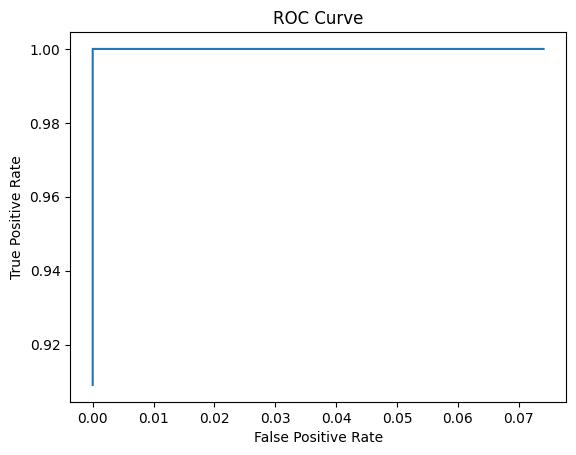

In [131]:
pipeline(data1_x, data1_y)

## Data 2 - Heart Disease Dataset

In [132]:
data2 = pd.read_csv('heart.csv')
data2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [133]:
data2_x = data2.iloc[:, :-1]
data2_y = data2.iloc[:, -1]

data2_y.value_counts()

target
1    526
0    499
Name: count, dtype: int64

Performance Measures: {'tp': 141, 'tn': 118, 'fp': 40, 'fn': 9, 'precision': 0.7790055248618785, 'recall': 0.94, 'spec': 0.7468354430379747, 'f1': 0.8519637462235649}

Trained weights: [ 1.07439519 -0.13679243 -0.72493788  1.28289284 -0.56608937 -0.46069561
 -0.10043976  0.70416387  1.80543394 -0.55538063 -1.38453939  0.56679251
 -1.46106476 -1.7473445 ]

Facility to plot decision boundary for data with more than 3 features has not been added yet!


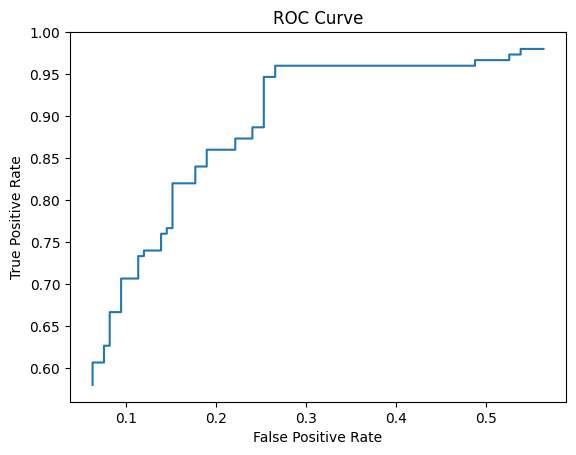

In [134]:
pipeline(data2_x, data2_y)